***Se importan las librerías necesarias para el funcionamiento del programa.***

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib

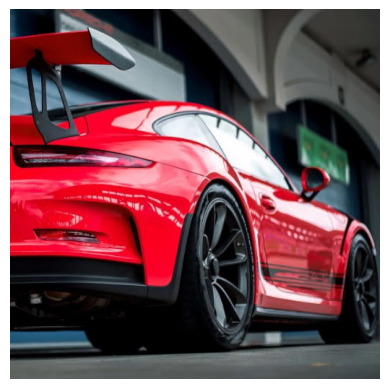

In [ ]:
# Lectura de imagen
img = cv2.imread('porsche.png')
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Mostrar resultado
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [ ]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray = cv2.normalize(img_gray.astype(float), None, 0.0, 1.0, cv2.NORM_MINMAX)

In [ ]:
# Generamos ruido con frecuencia de 10 Hz y Amplitud de 0.8
V = np.linspace(0, 1, 512)
Y = 0.8 * np.sin(2 * np.pi * 10 * V)
M = np.matlib.repmat(Y, 512, 1)
noise_img = np.add(M, img_gray)
freq10 = noise_img

In [ ]:
# Generamos ruido con frecuencia de 30 Hz y Amplitud de 0.5
V = np.linspace(0, 1, 512)
Y = 0.5 * np.sin(2 * np.pi * 30 * V)
M = np.matlib.repmat(Y, 512, 1)
noise_img = np.add(M, img_gray)
freq30 = noise_img

In [ ]:
# Generamos ruido con frecuencia de 50 Hz y Amplitud de 0.2
V = np.linspace(0, 1, 512)
Y = 0.2 * np.sin(2 * np.pi * 50 * V)
M = np.matlib.repmat(Y, 512, 1)
noise_img = np.add(M, img_gray)
freq50 = noise_img

(-0.5, 511.5, 511.5, -0.5)

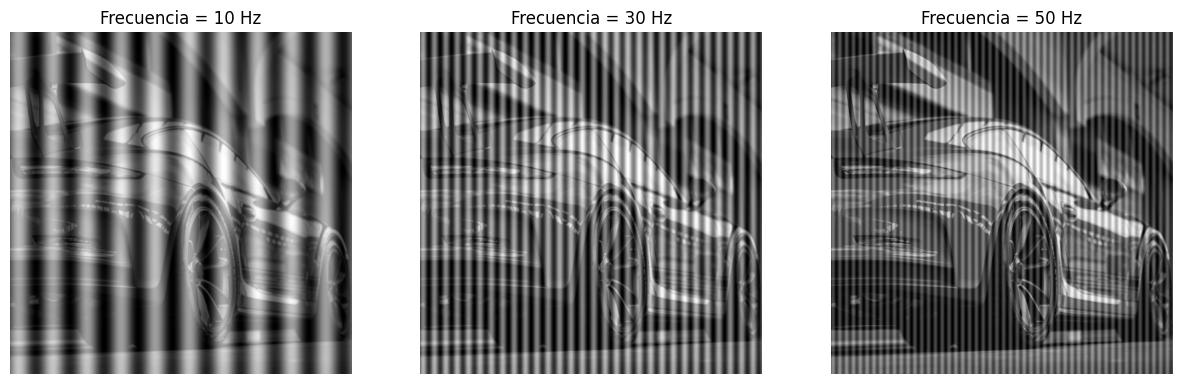

In [ ]:
plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(freq10, cmap="gray")
plt.title('Frecuencia = 10 Hz')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(freq30, cmap="gray")
plt.title('Frecuencia = 30 Hz')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(freq50, cmap="gray")
plt.title('Frecuencia = 50 Hz')
plt.axis('off')

<ipython-input-8-11e40a66d390>:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(fshift)),cmap='gray')


Text(0.5, 1.0, 'Espectro de Frecuencias')

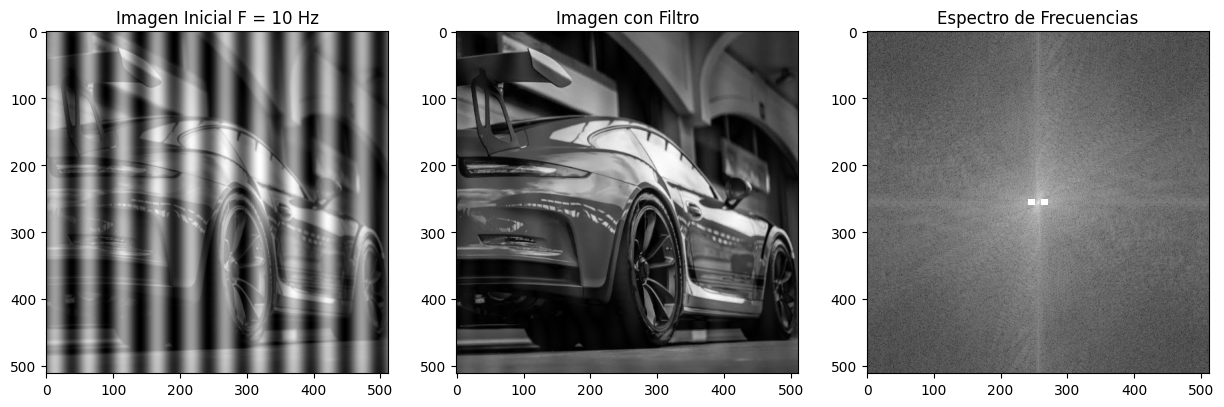

In [ ]:
# Aplicamos Fourier
F = np.fft.fft2(freq10)
fshift = np.fft.fftshift(F)

# Bloqueamos frecuencias con ruido

fshift[252:260, 242:250] = 0.0
fshift[252:260, 262:270] = 0.0

S = np.fft.ifft2(np.fft.fftshift(fshift))


# Desplegamos resultados
plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(freq10,cmap='gray')
plt.title("Imagen Inicial F = 10 Hz")
plt.subplot(1, 3, 2)
plt.imshow(np.abs(S), cmap='gray')
plt.title("Imagen con Filtro")
plt.subplot(1, 3, 3)
plt.imshow(np.log(np.abs(fshift)),cmap='gray')
plt.title("Espectro de Frecuencias")

<ipython-input-9-f06a784f200b>:22: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(fshift)),cmap='gray')


Text(0.5, 1.0, 'Espectro de Frecuencias')

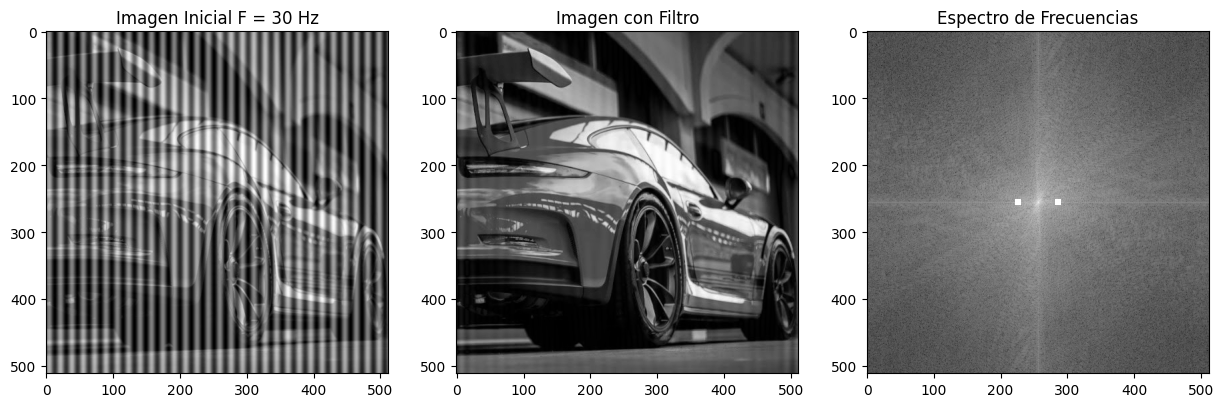

In [ ]:
# Aplicamos Fourier
F = np.fft.fft2(freq30)
fshift = np.fft.fftshift(F)

# Bloqueamos frecuencias con ruido

fshift[252:260, 222:230] = 0.0
fshift[252:260, 282:290] = 0.0

S = np.fft.ifft2(np.fft.fftshift(fshift))

# Desplegamos resultados
plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(freq30,cmap='gray')
plt.title("Imagen Inicial F = 30 Hz")
plt.subplot(1, 3, 2)
plt.imshow(np.abs(S), cmap='gray')
plt.title("Imagen con Filtro")
plt.subplot(1, 3, 3)
plt.imshow(np.log(np.abs(fshift)),cmap='gray')
plt.title("Espectro de Frecuencias")

<ipython-input-10-98d6a151c310>:22: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(fshift)),cmap='gray')


Text(0.5, 1.0, 'Espectro de Frecuencias')

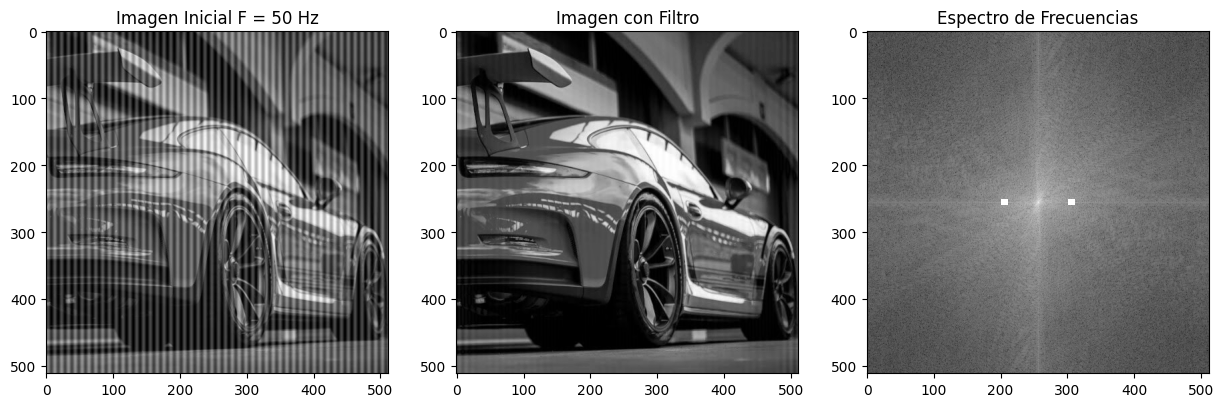

In [ ]:
# Aplicamos Fourier
F = np.fft.fft2(freq50)
fshift = np.fft.fftshift(F)

# Bloqueamos frecuencias con ruido

fshift[252:260, 202:210] = 0.0
fshift[252:260, 302:310] = 0.0

S = np.fft.ifft2(np.fft.fftshift(fshift))

# Desplegamos resultados
plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(freq50,cmap='gray')
plt.title("Imagen Inicial F = 50 Hz")
plt.subplot(1, 3, 2)
plt.imshow(np.abs(S), cmap='gray')
plt.title("Imagen con Filtro")
plt.subplot(1, 3, 3)
plt.imshow(np.log(np.abs(fshift)),cmap='gray')
plt.title("Espectro de Frecuencias")

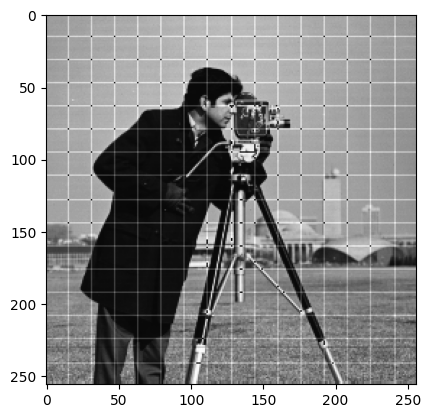

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('cameraman.png',cv2.IMREAD_GRAYSCALE)
m = img.shape[0]
delta = 15
V = np.fix(np.linspace(delta,m-delta,delta)).astype('uint8')
img[V,:] = img[V,:]+50
img[:,V] = img[:,V]+50
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('cameraman.png', cv2.IMREAD_GRAYSCALE)

# Calculate image shape
m = img.shape[0]

# Define delta and create indices
delta = 15
V = np.fix(np.linspace(delta, m - delta, delta)).astype('uint8')

# Find the first indices where noise is added
first_vertical_line_index = np.min(V)
first_horizontal_line_index = np.min(V)

# Display the first line coordinates
print("First vertical line coordinate:", first_vertical_line_index)
print("First horizontal line coordinate:", first_horizontal_line_index)


First vertical line coordinate: 15
First horizontal line coordinate: 15


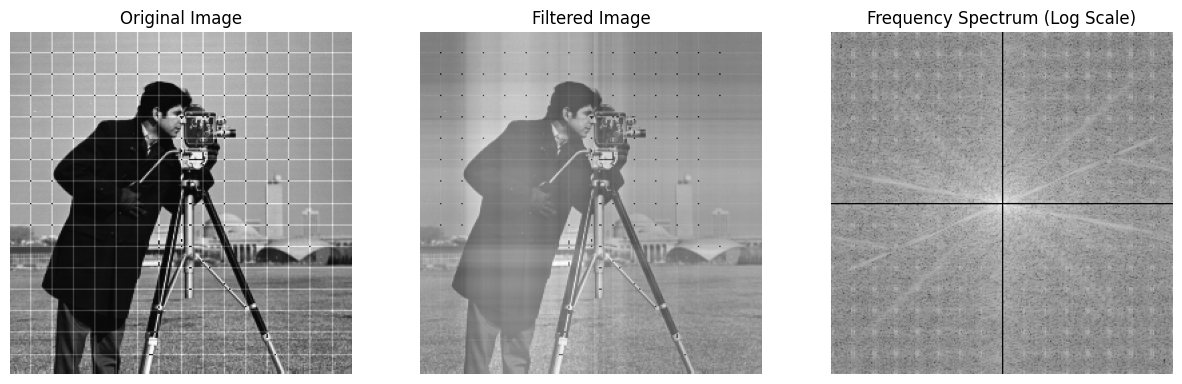

In [ ]:
import cv2
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from matplotlib import cm
from google.colab.patches import cv2_imshow

img = cv2.imread('cameraman.png',cv2.IMREAD_GRAYSCALE)
m = img.shape[0]
delta = 15
V = np.fix(np.linspace(delta,m-delta,delta)).astype('uint8')
img[V,:] = img[V,:]+50
img[:,V] = img[:,V]+50

noise_img = img

import numpy as np
import matplotlib.pyplot as plt

# Define the frequency range and size of the square
fc = 256
square_size = 15  # Size of the square in pixels

# Create points spaced 15 units apart
x = np.arange(-fc / 2, fc / 2)
y = np.arange(-fc / 2, fc / 2)
X, Y = np.meshgrid(x, y)

# Create a filter to block frequencies
H = np.ones((fc, fc))

for i in range(fc):
    if abs(x[i]) ==0:  # Exclude vertical lines within the range of -15 to 15
        H[:, i] = 0  # Vertical line
    if abs(y[i]) ==0:  # Exclude horizontal lines within the range of -15 to 15
        H[i, :] = 0  # Horizontal line



# Apply the filter to the FFT of the noisy image
F = np.fft.fft2(noise_img)
FS = np.fft.fftshift(F)
BF = H * FS
filtered_img = np.fft.ifft2(np.fft.ifftshift(BF)).real

# Compute the frequency spectrum
spectrum = np.abs(BF)

# Plotting
plt.figure(figsize=(15, 5))

# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(noise_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Plot the filtered image
plt.subplot(1, 3, 2)
plt.imshow(filtered_img, cmap='gray')
plt.title("Filtered Image")
plt.axis('off')

# Plot the frequency spectrum
plt.subplot(1, 3, 3)
plt.imshow(np.log(spectrum + 1), cmap='gray')  # Use log scale for better visualization
plt.title("Frequency Spectrum (Log Scale)")
plt.axis('off')

plt.show()


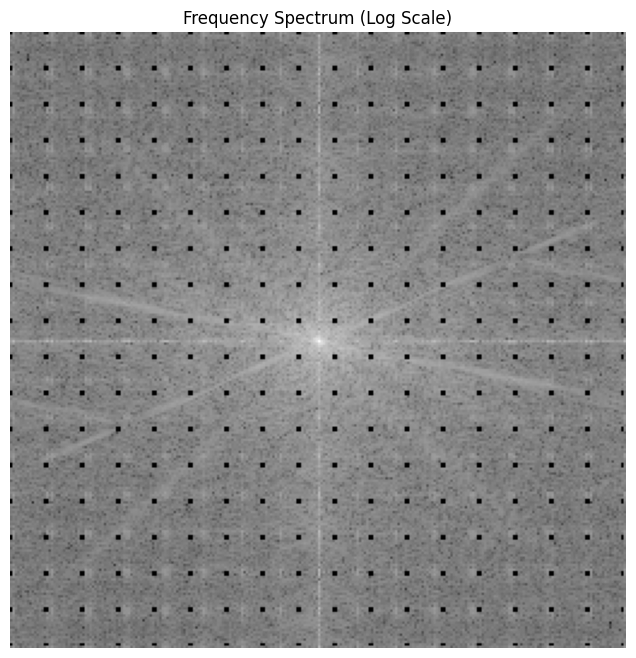

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(np.log(spectrum + 1), cmap='gray')  # Use log scale for better visualization
plt.title("Frequency Spectrum (Log Scale)")
plt.axis('off')

plt.show()

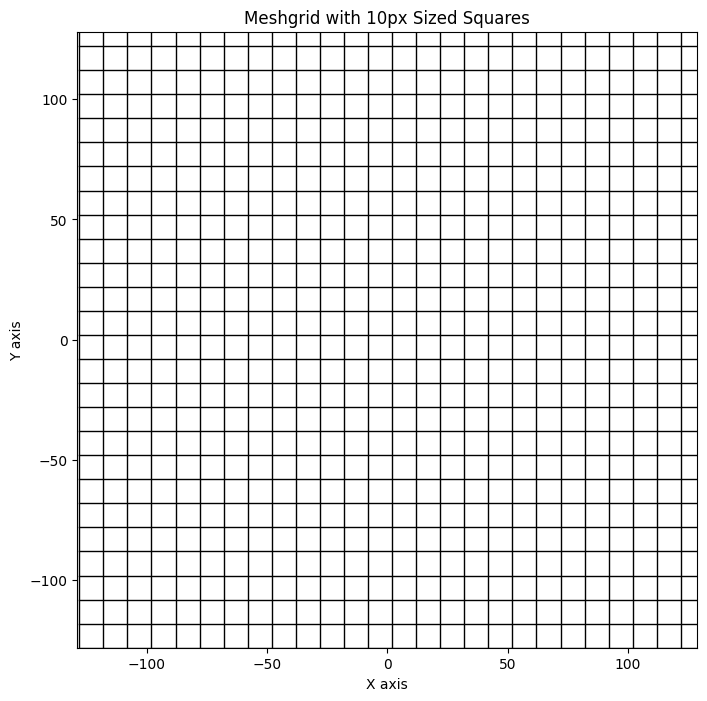

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the frequency range
fc = 256
square_size = 10  # Size of the square in pixels

# Create points spaced 10 units apart
x = np.arange(-fc / 2, fc / 2 + square_size, square_size)
y = np.arange(-fc / 2, fc / 2 + square_size, square_size)
X, Y = np.meshgrid(x, y)

# Plot the meshgrid
plt.figure(figsize=(8, 8))

# Draw the horizontal lines
for i in range(X.shape[0]):
    plt.plot(X[i, :], Y[i, :], 'k-', lw=1)  # Horizontal lines

# Draw the vertical lines
for j in range(X.shape[1]):
    plt.plot(X[:, j], Y[:, j], 'k-', lw=1)  # Vertical lines

plt.title("Meshgrid with 10px Sized Squares")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.grid(False)  # Turn off the default grid
plt.axis('equal')  # Ensure the aspect ratio is equal
plt.xlim([-fc / 2, fc / 2])  # Set the limits to match the grid size
plt.ylim([-fc / 2, fc / 2])  # Set the limits to match the grid size
plt.show()



